# Testing Marigold depth estimation 
*needs many iterations to perform well and is way too slow to use that way.

In [1]:
import numpy as np
from PIL import Image
from diffusers import DiffusionPipeline
from diffusers.utils import load_image
import matplotlib.pyplot as plt

pipe = DiffusionPipeline.from_pretrained(
    "Bingxin/Marigold",
    custom_pipeline="marigold_depth_estimation",
    # torch_dtype=torch.float16,                # (optional) Run with half-precision (16-bit float).
)
pipe.to("cuda")

c:\Users\pajul\anaconda3\envs\matine\lib\site-packages\huggingface_hub\file_download.py:678: FutureWarning: 'cached_download' is the legacy way to download files from the HF hub, please consider upgrading to 'hf_hub_download'
  warnings.warn(


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

text_encoder/model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

  Inference batches:   0%|          | 0/1 [00:00<?, ?it/s]

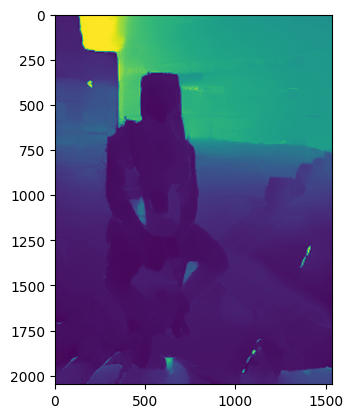

In [ ]:
img_path_or_url = "/home/ilari/Downloads/a91c1b01-2d68-49b3-9300-9005087f5c1e.JPG"
image: Image.Image = load_image(img_path_or_url)

pipeline_output = pipe(
    image,  # Input image.
    denoising_steps=10,  # (optional) Number of denoising steps of each inference pass. Default: 10.
    ensemble_size=1,  # (optional) Number of inference passes in the ensemble. Default: 10.
    processing_res=300,  # (optional) Maximum resolution of processing. If set to 0: will not resize at all. Defaults to 768.
    # match_input_res=True,   # (optional) Resize depth prediction to match input resolution.
    # batch_size=0,           # (optional) Inference batch size, no bigger than `num_ensemble`. If set to 0, the script will automatically decide the proper batch size. Defaults to 0.
    # color_map="Spectral",   # (optional) Colormap used to colorize the depth map. Defaults to "Spectral". Set to `None` to skip colormap generation.
    # show_progress_bar=True, # (optional) If true, will show progress bars of the inference progress.
)

depth: np.ndarray = pipeline_output.depth_np  # Predicted depth map
depth_colored: Image.Image = pipeline_output.depth_colored  # Colorized prediction
plt.imshow(depth)